In [1]:
import pandas as pd
import numpy as np
import os
os.chdir(r"C:\Training\Academy\Statistics (Python)\Datasets")
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import root_mean_squared_error

In [2]:
milk = pd.read_csv("monthly-milk-production-pounds-p.csv", index_col=0)
y = milk['Milk']
y_train = y[:-12]
y_test = y[-12:]
y_train.shape, y_test.shape

((156,), (12,))

In [3]:
result = adfuller(y, maxlag=10)
print("P-Value =", result[1])
if result[1] < 0.05:
    print("Time Series is Stationary")
else:
    print("Time Series is not Stationary")

P-Value = 0.64438326069301
Time Series is not Stationary


1st Order Differencing

In [5]:
result = adfuller(y.diff()[1:], maxlag=10)
print("P-Value =", result[1])
if result[1] < 0.05:
    print("Time Series is Stationary")
else:
    print("Time Series is not Stationary")

P-Value = 0.0
Time Series is Stationary


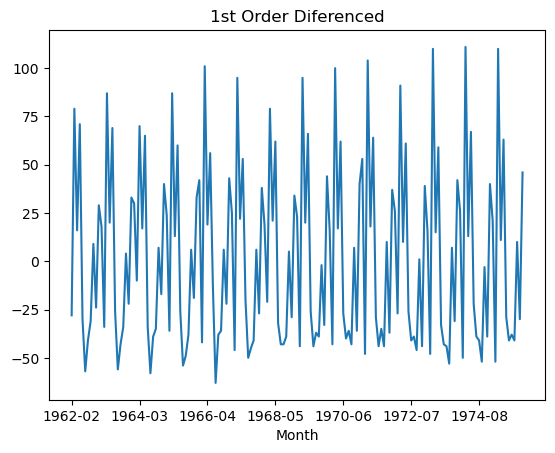

In [6]:
y.diff()[1:].plot()
plt.title("1st Order Diferenced")
plt.show()

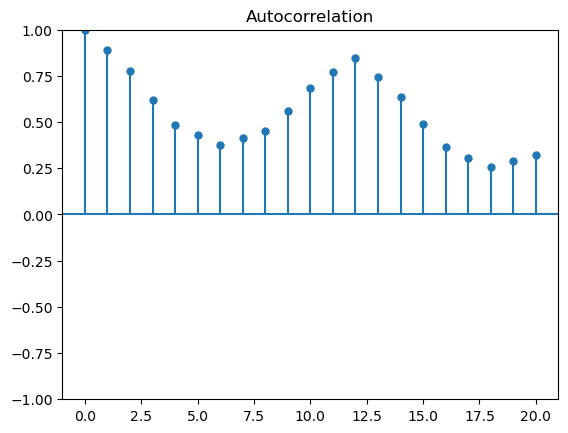

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(y, lags=20,alpha=None)
plt.show()

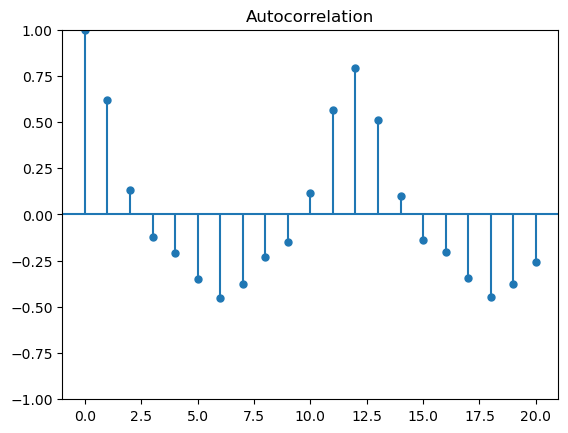

In [8]:
coal = pd.read_csv("Coal Consumption.csv", index_col=0)
plot_acf(coal['Amount'], lags=20,alpha=None)
plt.show()

### AR Model

In [10]:
from statsmodels.tsa.arima.model import ARIMA

In [11]:
y = milk['Milk']
y_train = y[:-12]
y_test = y[-12:]
y_train.shape, y_test.shape

((156,), (12,))

In [12]:
model = ARIMA(y_train,order=(1,0,0), freq='MS')
model_fit = model.fit()
model_fit.params

C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


const      741.622665
ar.L1        0.900561
sigma2    1933.729258
dtype: float64

In [13]:
y_pred = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1) 
root_mean_squared_error(y_test, y_pred)

98.7546080336063

In [14]:
y_test.index = y_pred.index

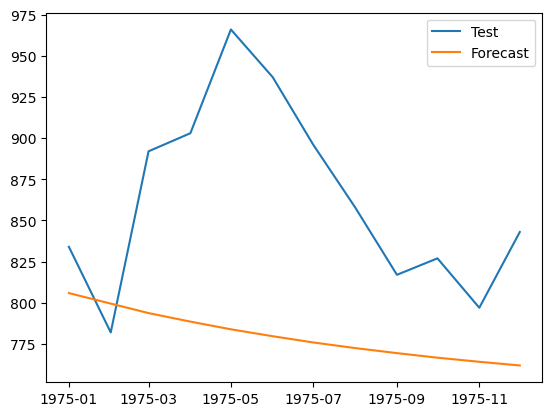

In [15]:
plt.plot(y_test, label='Test')
plt.plot(y_pred,label='Forecast')
plt.legend()
plt.show()

In [16]:
model = ARIMA(y_train,order=(12,1,0), freq='MS')
model_fit = model.fit()
y_pred = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1) 
root_mean_squared_error(y_test, y_pred)

C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Python\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


13.63231802592302

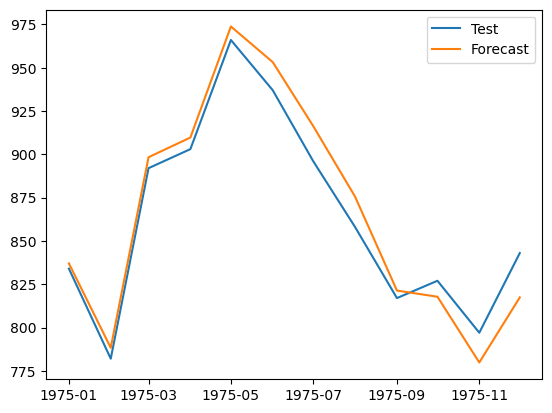

In [17]:
y_test.index = y_pred.index
plt.plot(y_test, label='Test')
plt.plot(y_pred,label='Forecast')
plt.legend()
plt.show()

### MA Model

In [19]:
model = ARIMA(y_train,order=(0,0,1), freq='MS')
model_fit = model.fit()
y_pred = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1) 
root_mean_squared_error(y_test, y_pred)

C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


126.20472461017361

In [20]:
model = ARIMA(y_train,order=(0,1,3), freq='MS')
model_fit = model.fit()
y_pred = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1) 
root_mean_squared_error(y_test, y_pred)

C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


58.27457428063061

## SARIMA

In [22]:
model = ARIMA(y_train,order=(3,1,0), freq='MS',seasonal_order=(1,1,1,12))
model_fit = model.fit()
y_pred = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1) 
root_mean_squared_error(y_test, y_pred)

C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


10.448497002045062

In [23]:
model_fit.params

ar.L1       -0.263642
ar.L2       -0.044438
ar.L3        0.097068
ar.S.L12    -0.051477
ma.S.L12    -0.579486
sigma2      53.356120
dtype: float64

## Auto ARIMA

In [25]:
from pmdarima.arima import auto_arima

In [26]:
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1593.689, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1624.299, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1626.095, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1626.164, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1622.458, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1604.395, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1618.644, Time=0.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1572.359, Time=0.52 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1561.947, Time=0.68 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=1565.392, Time=0

In [27]:
y_pred = model.predict(n_periods=len(y_test))
root_mean_squared_error(y_test, y_pred)

58.08354844219336

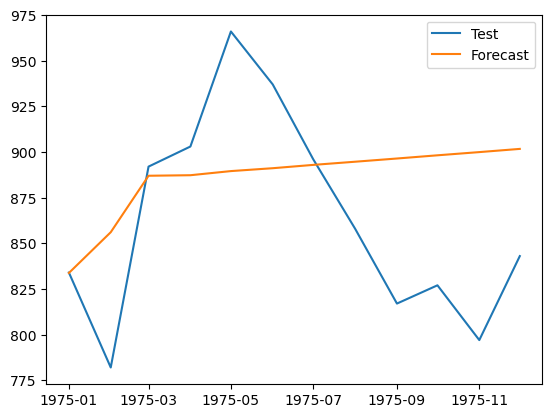

In [28]:
y_test.index = y_pred.index
plt.plot(y_test, label='Test')
plt.plot(y_pred,label='Forecast')
plt.legend()
plt.show()

## SARIMA (auto)

In [30]:
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True,
                  seasonal=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1000.136, Time=1.30 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1218.095, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1015.855, Time=0.33 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1104.312, Time=0.31 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1349.320, Time=0.03 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=998.169, Time=0.94 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=1038.230, Time=0.29 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=1000.125, Time=2.31 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=1012.395, Time=0.80 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=3.77 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=996.457, Time=0.58 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=1036.989, Time=0.17 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=998.423, Time=0.71 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=998.411, Time=1.52 sec
 ARIMA(1,0,2)(1,1,0)[12] int

In [31]:
y_pred = model.predict(n_periods=len(y_test))
root_mean_squared_error(y_test, y_pred)

13.941314595826514

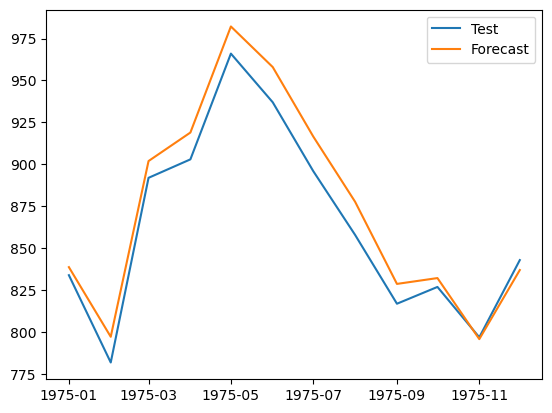

In [32]:
y_test.index = y_pred.index
plt.plot(y_test, label='Test')
plt.plot(y_pred,label='Forecast')
plt.legend()
plt.show()